# Part - 1
## Identifying and filling in missing data

In [1]:
import pandas as pd
import numpy as np

In [2]:
titanic_df = pd.read_csv('train.csv')

In [3]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
titanic_df['Age'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [6]:
sum(titanic_df['Age'].isnull() == True)

177

# Replacement Strategies

## 1. Imputation

In [5]:
titanic_df['Age_repl1'] = titanic_df['Age']

In [11]:
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan, strategy='constant')
titanic_df['Age_repl1'] = imputer.fit_transform(titanic_df['Age_repl1'].values.reshape(-1,1))

In [12]:
titanic_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [13]:
titanic_df['Age_repl1'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age_repl1, dtype: float64

## 2. Replacing with Mean

In [176]:
titanic_df1 = pd.read_csv('../Missing Data Exercise/train.csv')

In [177]:
titanic_df1['Age_repl1'] = titanic_df1['Age']

In [178]:
titanic_df1['Age_repl1'].isnull().sum()

177

In [179]:
titanic_df1['Age_repl1'].mean()

29.69911764705882

In [180]:
titanic_df1['Age_repl1'] = titanic_df1['Age_repl1'].replace(np.NaN, titanic_df1['Age_repl1'].mean())

In [181]:
titanic_df1['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [182]:
titanic_df1['Age_repl1'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age_repl1, dtype: float64

## 3. Replacing with Median

In [184]:
titanic_df2 = pd.read_csv('../Missing Data Exercise/train.csv')

In [185]:
titanic_df2['Age_repl1'] = titanic_df2['Age']

In [186]:
titanic_df2['Age_repl1'].isnull().sum()

177

In [187]:
titanic_df2['Age_repl1'].median()

28.0

In [188]:
titanic_df2['Age_repl1'] = titanic_df2['Age_repl1'].replace(np.NaN, titanic_df2['Age_repl1'].median())

In [189]:
titanic_df2['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [190]:
titanic_df2['Age_repl1'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age_repl1, dtype: float64

## 4. Replacing with Mode

In [193]:
titanic_df3 = pd.read_csv('../Missing Data Exercise/train.csv')

In [194]:
titanic_df3['Age_repl1'] = titanic_df3['Age']

In [195]:
from scipy import stats

most_freq_age, count = stats.mode(titanic_df3['Age_repl1'])

age_mode = int(most_freq_age) 
print(age_mode)

24


In [197]:
titanic_df3['Age_repl1'] = titanic_df3['Age_repl1'].replace(np.nan, age_mode)

In [198]:
titanic_df3['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [199]:
titanic_df3['Age_repl1'].describe()

count    891.000000
mean      28.566970
std       13.199572
min        0.420000
25%       22.000000
50%       24.000000
75%       35.000000
max       80.000000
Name: Age_repl1, dtype: float64

## 5. K-Nearest Neighbor Imputation

In [246]:
titanic_df4 = pd.read_csv('../Missing Data Exercise/train.csv')

In [247]:
titanic_df4['Age_repl1'] = titanic_df4['Age']

In [248]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors = 2)

In [249]:
titanic_df4['Age_repl1'] = knn_imputer.fit_transform(titanic_df4['Age_repl1'].values.reshape(-1,1))

In [250]:
titanic_df4['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [251]:
titanic_df4['Age_repl1'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age_repl1, dtype: float64

### For me "Replacing with Mean" and "K-Nearest Neighbor Imputation" replacement strategies worked best in terms of preserving   overall dataset properties

# Part - 2

In [60]:
print(round(titanic_df[['Sex', 'Pclass','Age']].\
                       groupby(['Pclass', 'Sex']).mean()))

                Age
Pclass Sex         
1      female  35.0
       male    41.0
2      female  29.0
       male    31.0
3      female  22.0
       male    27.0


<AxesSubplot:xlabel='Age', ylabel='Density'>

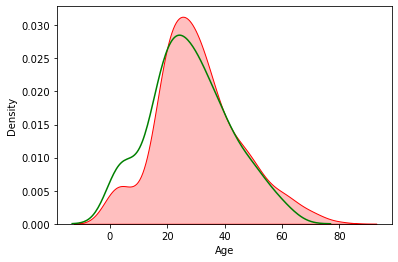

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure()
sns.kdeplot(titanic_df[titanic_df.Sex=='female']['Age'], color="green")
sns.kdeplot(titanic_df[titanic_df.Sex=='male']['Age'], color="red", shade=True)

In [35]:
print('Pclass1 Male Passengers above Age 60:', round(len(titanic_df[(titanic_df['Pclass']==1) & \
    (titanic_df['Age']>59) & (titanic_df['Sex']=='male')])/len(titanic_df[(titanic_df\
    ['Pclass']==1) & (titanic_df['Age']>59)])*100,1), '%')

print('Pclass2 Male Passengers above Age 60:', round(len(titanic_df[(titanic_df['Pclass']==2) & \
    (titanic_df['Age']>59) & (titanic_df['Sex']=='male')])/len(titanic_df[(titanic_df \
    ['Pclass']==2) & (titanic_df['Age']>59)])*100,1), '%')

print('Pclass3 Male Passengers above Age 60:', round(len(titanic_df[(titanic_df['Pclass']==3) & \
    (titanic_df['Age']>59) & (titanic_df['Sex']=='male')])/len(titanic_df[(titanic_df \
    ['Pclass']==3) & (titanic_df['Age']>59)])*100,1), '%')

Pclass1 Male Passengers above Age 60: 82.4 %
Pclass2 Male Passengers above Age 60: 100.0 %
Pclass3 Male Passengers above Age 60: 80.0 %


In [36]:
print('Pclass1 Female Passengers between 20-30 Age:',round(len(titanic_df[(titanic_df['Pclass']==1) \
    &(titanic_df['Age']>19) & (titanic_df['Age']<31) & (titanic_df['Sex']=='female')])/len( \
    titanic_df[(titanic_df['Pclass']==1) & (titanic_df['Age']>19) \
    & (titanic_df['Age']<31)])*100,1),'%')

print('Pclass2 Female Passengers between 20-30 Age:',round(len(titanic_df[(titanic_df['Pclass']==2) \
    &(titanic_df['Age']>19) & (titanic_df['Age']<31) &(titanic_df['Sex']=='female')])/len( \
    titanic_df[(titanic_df['Pclass']==2)&(titanic_df['Age']>19) \
    &(titanic_df['Age']<31)])*100,1),'%')

print('Pclass3 Female Passengers between 20-30 Age:',round(len(titanic_df[(titanic_df['Pclass']==3) \
    &(titanic_df['Age']>19) & (titanic_df['Age']<31) &(titanic_df['Sex']=='female')])/len( \
    titanic_df[(titanic_df['Pclass']==3) & (titanic_df['Age']>19) \
    &(titanic_df['Age']<31)])*100,1),'%')

Pclass1 Female Passengers between 20-30 Age: 52.5 %
Pclass2 Female Passengers between 20-30 Age: 45.9 %
Pclass3 Female Passengers between 20-30 Age: 24.0 %


In [13]:
titanic_df5 = pd.read_csv('train.csv')

In [14]:
titanic_df5['Age_repl1'] = titanic_df5['Age']

In [15]:
gender_class = titanic_df5.groupby(['Sex','Pclass'])['Age_repl1'].agg(['mean','std','median'])
print(gender_class)

                    mean        std  median
Sex    Pclass                              
female 1       34.611765  13.612052    35.0
       2       28.722973  12.872702    28.0
       3       21.750000  12.729964    21.5
male   1       41.281386  15.139570    40.0
       2       30.740707  14.793894    30.0
       3       26.507589  12.159514    25.0


In [16]:
titanic_df5['Age_repl1'] = titanic_df5.groupby(['Sex','Pclass'])['Age_repl1'].transform(lambda grp: grp.fillna(np.mean(grp)))

In [17]:
titanic_df5['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [18]:
titanic_df5['Age_repl1'].describe()

count    891.000000
mean      29.318643
std       13.281103
min        0.420000
25%       21.750000
50%       26.507589
75%       36.000000
max       80.000000
Name: Age_repl1, dtype: float64

In [19]:
titanic_df6 = pd.read_csv('train.csv')

In [20]:
titanic_df6['Age_repl1'] = titanic_df6['Age']

In [22]:
gender = titanic_df6.groupby(['Sex'])['Age_repl1'].agg(['mean','std','median'])
print(gender)

             mean        std  median
Sex                                 
female  27.915709  14.110146    27.0
male    30.726645  14.678201    29.0


In [38]:
titanic_df6['Age_repl1'] = titanic_df6.groupby(['Sex'])['Age_repl1'].transform(lambda grp: grp.fillna(np.mean(grp)))

In [39]:
titanic_df6['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [40]:
titanic_df6['Age_repl1'].describe()

count    891.000000
mean      29.736034
std       13.014897
min        0.420000
25%       22.000000
50%       30.000000
75%       35.000000
max       80.000000
Name: Age_repl1, dtype: float64

In [27]:
titanic_df7 = pd.read_csv('train.csv')

In [28]:
titanic_df7['Age_repl1'] = titanic_df7['Age']

In [30]:
pclass = titanic_df7.groupby(['Pclass'])['Age_repl1'].agg(['mean','std','median'])
print(pclass)

             mean        std  median
Pclass                              
1       38.233441  14.802856    37.0
2       29.877630  14.001077    29.0
3       25.140620  12.495398    24.0


In [31]:
titanic_df7['Age_repl1'] = titanic_df7.groupby(['Pclass'])['Age_repl1'].transform(lambda grp: grp.fillna(np.mean(grp)))

In [32]:
titanic_df7['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [33]:
titanic_df7['Age_repl1'].describe()

count    891.000000
mean      29.292875
std       13.210527
min        0.420000
25%       22.000000
50%       26.000000
75%       37.000000
max       80.000000
Name: Age_repl1, dtype: float64

### Here, I have looked for the passenger types in Sex and Pclass columns. The replacement strategy I have used for both Sex and Pclass is "Replacing with Mean".
### In both the cases the replacement strategies worked differently. The values of mean, standard deviation and median for Pclass 1, 2 and 3 are different. Also, the values of mean, standard deviation and median for Sex Male and Female are different. 
### Hence, we can say that the replacement strategy "Replacing with Mean" affects the passenger types differently. 